## Laboratorium 4

### Autogluon

#### Zadanie 1
Korzystając z danych z repozytorium OpenML wybierzcie zbiory danych do klasyfikacji binarnej, klasyfikacji wieloetykietowej i regresji. Wybierzcie zbiory danych z brakami danych i bez nich. Stwórzcie słownik zbiorów danych przypisując im też odpowiednie tagi. Dla każdego zbioru wytrenujcie model w Autogluonie. Co do jakości wytrenowanych modeli skorzystajcie z instrukcji na temat argumntu `preset` - zbdajcie jak zmieniają się wytrenowane modele w zależności d argumentu `preset` (najlepiej zpisać wyniki poszczególnych eksperymentów - wyników `predictor.leaderboard(test_data, silent=True)`, w słowniku)



We recommend users to start with `medium_quality` to get a sense of the problem and identify any data related issues. If `medium_quality` is taking too long to train, consider subsampling the training data during this prototyping phase.

Once you are comfortable, next try `best_quality`. Make sure to specify at least 16x the time_limit value as used in `medium_quality`. Once finished, you should have a very powerful solution that is often stronger than `medium_quality`.

Make sure to consider holding out test data that AutoGluon never sees during training to ensure that the models are pe
rforming as expected in terms of performance.

Once you evaluate both `best_quality` and `medium_quality`, check if either satisfies your needs. If neither do, consider trying high_quality and/or good_quality.

If none of the presets satisfy requirements, refer to Predicting Columns in a Table - In Depth for more advanced AutoGluon options.

In [ ]:
### Solution

### Random Search

### Optymalizacja Bayesowska


#### Zadanie 1

Przeprowadź optymalizację bayesowską


In [5]:
# !pip install scikit-optimize==0.5.2
# !pip install GPy==1.9.8
# !pip install GPyOpt==1.2.1
# !pip install xgboost==0.90
# Get additional files from Github
!wget https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/master/bayesian_optimization_util.py

--2023-10-24 17:24:20--  https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/master/bayesian_optimization_util.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1536 (1,5K) [text/plain]
Saving to: ‘bayesian_optimization_util.py’

bayesian_optimizati 100%[===================>]   1,50K  --.-KB/s    in 0s      

2023-10-24 17:24:20 (11,3 MB/s) - ‘bayesian_optimization_util.py’ saved [1536/1536]



In [2]:
import numpy as np

%matplotlib inline

bounds = np.array([[-1.0, 2.0]])
noise = 0.2

def f(X, noise=noise):
    return -np.sin(3*X) - X**2 + 0.7*X + noise * np.random.randn(*X.shape)

X_init = np.array([[-0.9], [1.1]])
Y_init = f(X_init)

/tmp/ipykernel_45999/25237712.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X = np.arange(bounds[:, 0], bounds[:, 1], 0.01).reshape(-1, 1)


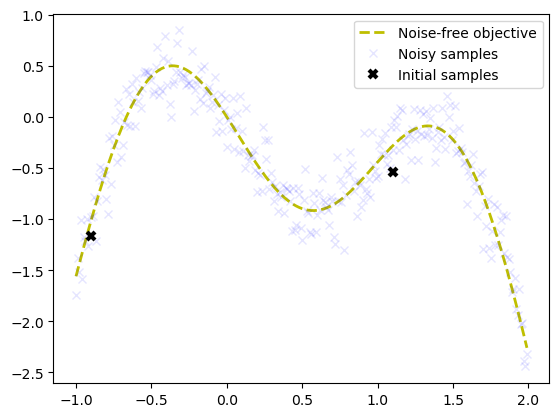

In [3]:
import matplotlib.pyplot as plt

# Dense grid of points within bounds
X = np.arange(bounds[:, 0], bounds[:, 1], 0.01).reshape(-1, 1)

# Noise-free objective function values at X 
Y = f(X,0)

# Plot optimization objective with noise level 
plt.plot(X, Y, 'y--', lw=2, label='Noise-free objective')
plt.plot(X, f(X), 'bx', lw=1, alpha=0.1, label='Noisy samples')
plt.plot(X_init, Y_init, 'kx', mew=3, label='Initial samples')
plt.legend();


#### Scikit-optimize

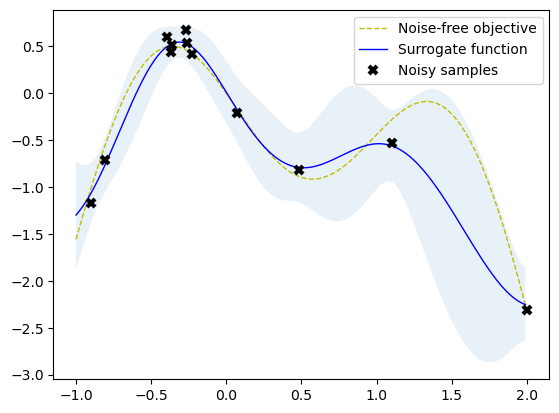

In [9]:
from sklearn.base import clone
from skopt import gp_minimize
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import ConstantKernel, Matern
from bayesian_optimization_util import plot_approximation, plot_acquisition, plot_convergence

# Use custom kernel and estimator to match previous example
m52 = ConstantKernel(1.0) * Matern(length_scale=1.0, nu=2.5)
gpr = GaussianProcessRegressor(kernel=m52, alpha=noise**2)

r = gp_minimize(lambda x: -f(np.array(x))[0], 
                bounds.tolist(),
                base_estimator=gpr,
                acq_func='EI',      # expected improvement
                xi=0.01,            # exploitation-exploration trade-off
                n_calls=10,         # number of iterations
                n_random_starts=0,  # initial samples are provided
                x0=X_init.tolist(), # initial samples
                y0=-Y_init.ravel())

# Fit GP model to samples for plotting results
gpr.fit(r.x_iters, -r.func_vals)

# Plot the fitted model and the noisy samples
plot_approximation(gpr, X, Y, r.x_iters, -r.func_vals, show_legend=True)

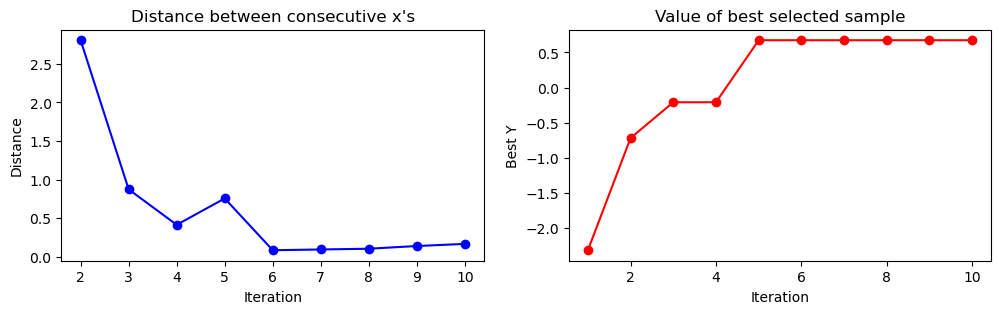

In [10]:
plot_convergence(np.array(r.x_iters), -r.func_vals)